<a href="https://colab.research.google.com/github/Bhags03/Titanic_Classification/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Classification**

**Importing Libraries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Training Data**

In [7]:
train_data = pd.read_csv("/content/sample_data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Testing Data**

In [8]:
test_data = pd.read_csv("/content/sample_data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Cleaning the Data**

Finding out the NULL values

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Dropping the column Cabin because it has more null values and is not necessary for the prediction

In [11]:
train_data = train_data.drop(["Cabin"], axis=1)
test_data = test_data.drop(["Cabin"], axis=1)

Filling in the missing data

In [12]:
train_data["Age"] = train_data["Age"].interpolate(method="linear")
test_data["Age"] = test_data["Age"].interpolate(method="linear")

In [13]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode().iloc[0])
test_data["Embarked"] = test_data["Embarked"].fillna(test_data["Embarked"].mode().iloc[0])

In [14]:
test_data["Fare"] = test_data["Fare"].interpolate(method="linear")

In [15]:
train_data.duplicated().sum()

0

In [16]:
test_data.duplicated().sum()

0

**Visualization of the training data**

Based on **Sex**

<Axes: ylabel='Survived'>

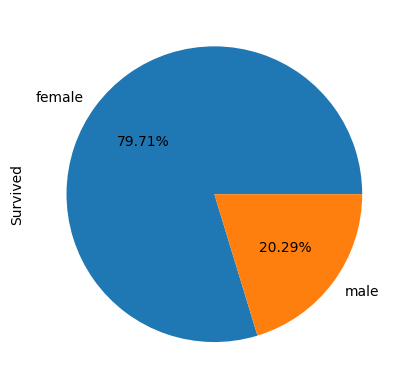

In [21]:
train_data.groupby(['Sex'])['Survived'].mean().plot(kind='pie',autopct='%.2f%%')

Based on **Age**

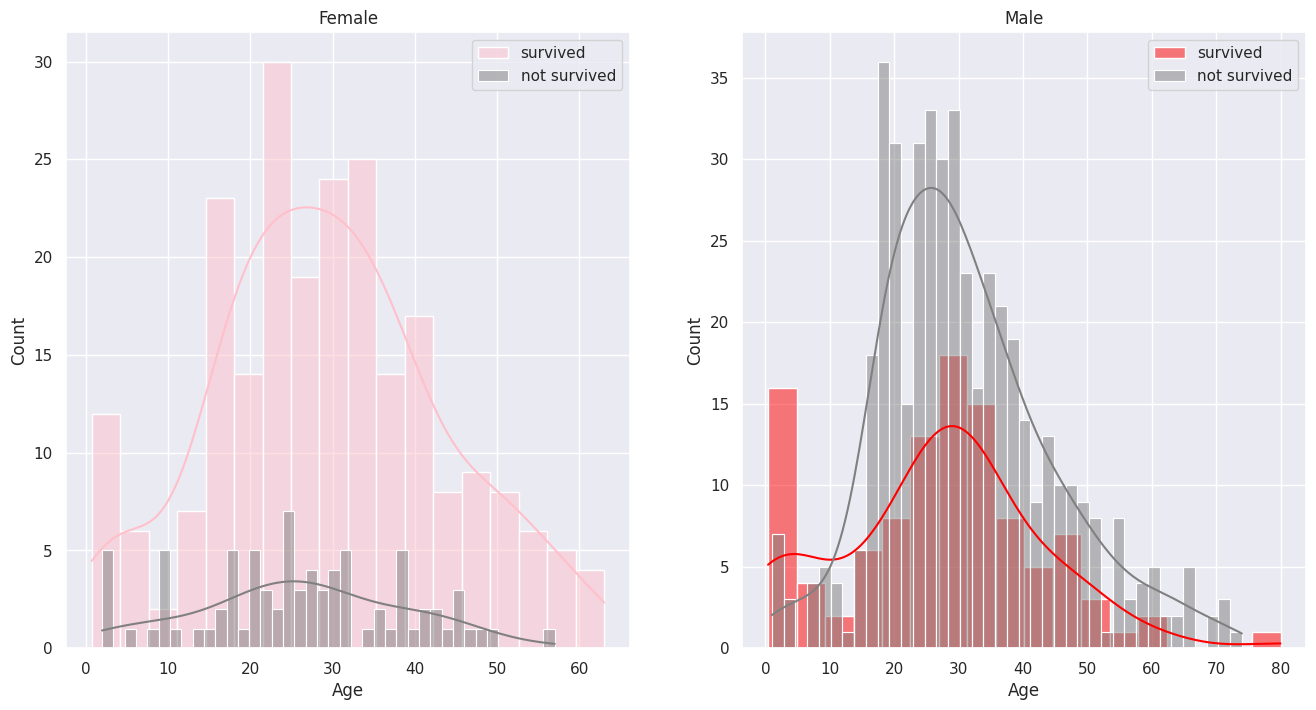

In [41]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =True, color="pink")
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =True, color="grey")
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = True, color="red")
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = True, color="grey")
ax.legend()
_ = ax.set_title('Male');

Based on **Class**

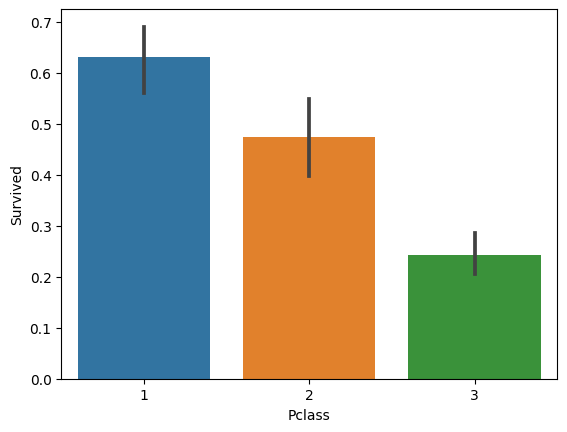

In [35]:
sns.barplot(x='Pclass', y='Survived', data=train_data);

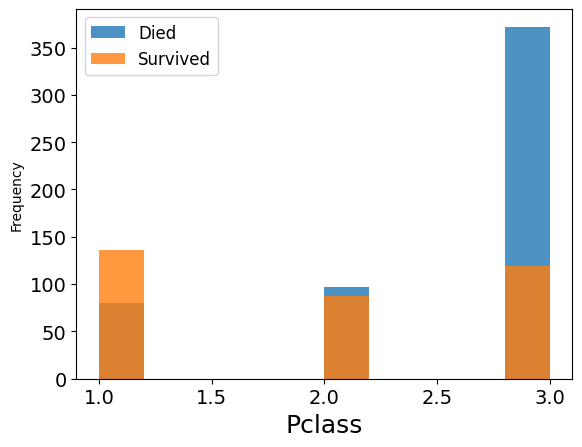

In [37]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.figure()
fig = train_data.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

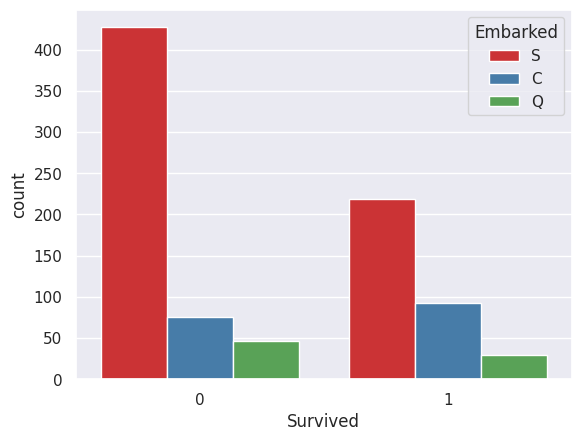

In [38]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=train_data, hue="Embarked", palette="Set1");

Based on **Family**

In [43]:
train_data['family'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['family'] = test_data['SibSp'] + test_data['Parch'] + 1

<Axes: xlabel='family', ylabel='Count'>

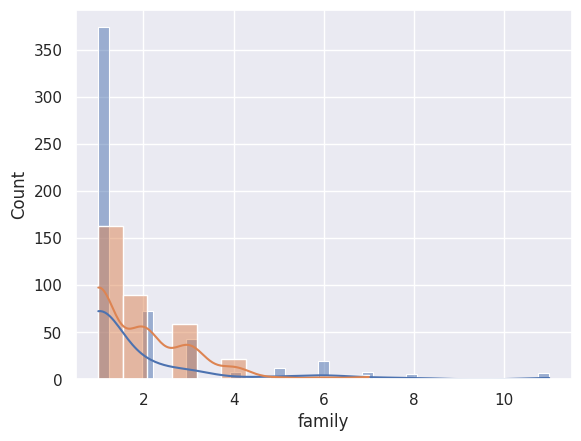

In [45]:
sns.histplot(train_data['family'][train_data['Survived']==0], kde = True)
sns.histplot(train_data['family'][train_data['Survived']==1], kde = True)

**Prediction**

In [17]:
y = train_data["Survived"]
features = ["Age", "Fare", "SibSp", "Parch", "Embarked", "Sex", "Pclass"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
